# Импорт библиотек

In [53]:
!pip install catboost

In [54]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего


# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler # Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder # Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Импортируем порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline. Ни добавить, ни убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [55]:
plt.style.use('dark_background') # для модных черных рисунков

In [56]:
import warnings
warnings.filterwarnings('ignore')

# Набор данных

**Предсказание цены на дом (из 2й домашки)**

Набор данных представляет собой 1460 строк и 79 переменных, описывающих (почти) каждый аспект жилых домов в Эймсе, штат Айова.

С помощью этого датасета решается задача регрессии - предсказать окончательную стоимость дома (перменная SalePrice).

Наша цель - увидеть, как те или иные признаки влияют на стоимость дома, а также их взаимосвязь друг с другом.

Так как признаков очень много, выберу по 5 самых интересующих меня категориальных и числовых признаков для будующей работы.

Выбранные числовые признаки:

LotArea (площадь участка в квадратных футах)

YearBuilt (год постройки)

BedroomAbvGr (кол-во спален выше уровня земли)

GarageArea (площадь гаража в квадратных футах)

MoSold (месяц продажи)

Выбранные категориальные признаки:

Street (тип дороги, ведущей к участку)

Utilities (тип доступных коммунальных услуг)

LotConfig (конфигурация участка)

Condition1 (близость к различным условиям)

RoofStyle (тип крыши)

Нашей целевой переменной остается SalePrice

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/dariaValerievna/Analytics/refs/heads/dariaValerievna-homework-1/train.csv', delimiter = ',') # считываем файл из интернета
df #выведем DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [58]:
#удаляем все колонки, в которых присутсвует хоть одно значение Nan
df = df.dropna(axis=1)

In [59]:
#запишем выбранные признаки в новые переменные
cat_columns_new = ['Street', 'Utilities', 'LotConfig', 'Condition1', 'RoofStyle']
num_columns_new = ['LotArea', 'YearBuilt', 'BedroomAbvGr', 'GarageArea', 'MoSold', 'SalePrice']

#удаляем из датафрейма остальные признаки
df = df.drop(columns=[col for col in df.columns if (col not in cat_columns_new) and (col not in num_columns_new)])

df

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,8450,Pave,AllPub,Inside,Norm,2003,Gable,3,548,2,208500
1,9600,Pave,AllPub,FR2,Feedr,1976,Gable,3,460,5,181500
2,11250,Pave,AllPub,Inside,Norm,2001,Gable,3,608,9,223500
3,9550,Pave,AllPub,Corner,Norm,1915,Gable,3,642,2,140000
4,14260,Pave,AllPub,FR2,Norm,2000,Gable,4,836,12,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1456,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1457,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1458,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125


# Предварительная обработка данных

## Предварительная обработка числовых признаков

**Чистим столбцы**

In [60]:
question_lotArea = df[(df.LotArea > 1e5)]
df = df.drop(question_lotArea.index)

question_lotArea_2 = df[(df.LotArea > 16000)]
df = df.drop(question_lotArea_2.index)

question_yearBuilt = df[(df.YearBuilt < 1900)]
df = df.drop(question_yearBuilt.index)

question_garageArea = df[(df.GarageArea < 200)]
df = df.drop(question_garageArea.index)

question_garageArea_1 = df[(df.GarageArea > 1000)]
df = df.drop(question_garageArea_1.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
df.tail()

,LotArea,Street,Utilities,LotConfig,Condition1,YearBuilt,RoofStyle,BedroomAbvGr,GarageArea,MoSold,SalePrice
1239,7917,Pave,AllPub,Inside,Norm,1999,Gable,3,460,8,175000
1240,13175,Pave,AllPub,Inside,Norm,1978,Gable,3,500,2,210000
1241,9042,Pave,AllPub,Inside,Norm,1941,Gable,4,252,5,266500
1242,9717,Pave,AllPub,Inside,Norm,1950,Hip,2,240,4,142125
1243,9937,Pave,AllPub,Inside,Norm,1965,Gable,3,276,6,147500


**Визуализируем**

 Видно, что все столбцы имеют относительно нормальное распределение

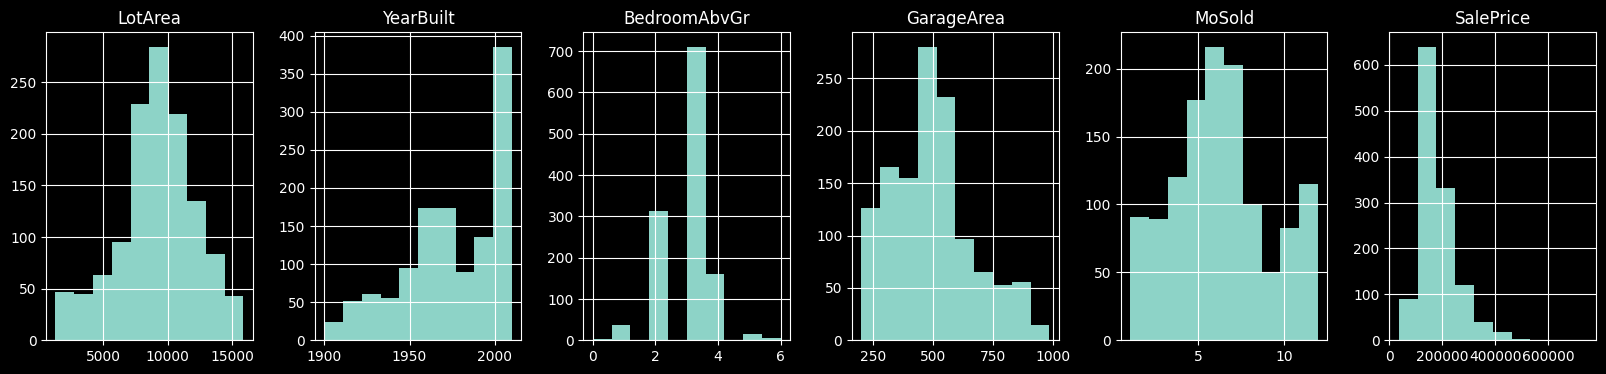

In [61]:
fig, axs = plt.subplots(1,6,figsize=(20,  4)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим, что у нас будет 1 строка и 4 столбца

df.hist(column = num_columns_new, ax = axs);

**Нормализация**

In [62]:
DF  = df.copy()
Xmin = df[num_columns_new].min() # находим минимум (для каждого числового признака)
Xmax = df[num_columns_new].max() # находим максимум (для каждого числового признака)
                                                # ↓ каждый столбец делится на свою разницу максимума и минимума
DF[num_columns_new] = (df[num_columns_new]- Xmin)/( Xmax - Xmin) # реализуем нормализацию. матричные операции работают
                                        # ↑ из каждого стобца вычитаем свой минимум

**Стандартизация**

In [63]:
M = DF[num_columns_new].mean() # находим среднее (для каждого числового признака)
STD = DF[num_columns_new].std() # находим стандартное отклонение (для каждого числового признака)
DF[num_columns_new] = (DF[num_columns_new]-M)/STD # реализуем стандартизацию. матричные операции работают

**Степенное преобразование**

In [64]:
pt = PowerTransformer()

pt.fit(DF[num_columns_new]);

In [65]:
power = pt.transform(DF[num_columns_new])
df_power = pd.DataFrame(power, columns= num_columns_new)
df_power

,LotArea,YearBuilt,BedroomAbvGr,GarageArea,MoSold,SalePrice
0,-0.306116,1.107616,0.196830,0.426528,-1.722636,0.653393
1,0.077258,-0.121489,0.196830,-0.092431,-0.462927,0.280031
2,0.670275,1.003802,0.196830,0.743289,0.996955,0.827796
3,0.060031,-1.764715,0.196830,0.913253,-1.722636,-0.512424
4,1.847303,0.952598,1.510394,1.792297,1.968945,1.096774
...,...,...,...,...,...,...
1239,-0.475720,0.901870,0.196830,-0.092431,0.655154,0.174496
1240,1.411101,-0.044420,0.196830,0.153177,-1.722636,0.671714
1241,-0.112084,-1.174282,1.510394,-1.591973,-0.462927,1.244976
1242,0.117757,-0.941272,-1.100337,-1.687737,-0.870326,-0.465188


## Предварительная обработка категориальных признаков

**Порядковое коидрование**

In [66]:
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns_new]);

Ordinal_encoded = ordinal.transform(DF[cat_columns_new])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns_new)

**One-hot кодирование многозначных признаков**

In [67]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output= False)
ohe.fit(DF[cat_columns_new]);

ohe_feat = ohe.transform(DF[cat_columns_new])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

## Pipeline

In [68]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.target_mean = {}

    def fit(self, X, y):
        if self.cols is None:
            self.cols = X.columns
        for col in self.cols:
            self.target_mean[col] = {}
            X_copy = X.copy()
            X_copy[y.name]=y
            self.target_mean[col] = X_copy.groupby(col)[y.name].mean().to_dict()
        return self

    def transform(self, X):
        for col in self.cols:
            X[col] = X[col].map(self.target_mean[col])
            X[col] = X[col].fillna(np.mean(X[col]))
        return X

In [69]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        self.columns = X.columns

        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

    def get_feature_names_out(self, feature_names):
        return self.columns

In [70]:
num_pipe_lotArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler())
])
num_lotArea = ['LotArea']

num_pipe_GarArea = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01,)),
    ('scaler', StandardScaler()),
     ('power', PowerTransformer())
])
num_GarArea = ['GarageArea']

num_pipe_BAG = Pipeline([
    ('power', PowerTransformer())
])
num_BAG = ['BedroomAbvGr']

num_pipe_YB = Pipeline([
    ('power', PowerTransformer())
])
num_YB = ['YearBuilt']

num_pipe_SP = Pipeline([
    ('power', PowerTransformer())
])
num_SP = ['SalePrice']

num_pipe_moSold = Pipeline([
    ('scaler', StandardScaler())
])
num_moSold = ['MoSold']

cat_pipe_street = Pipeline([
    ('encoder', TargetEncoder())

])
cat_street = ['Street']

cat_pipe_util = Pipeline([
    ('encoder', TargetEncoder())

])
cat_util = ['Utilities']

cat_pipe_lotCon = Pipeline([
    ('encoder', TargetEncoder())

])
cat_lotCon = ['LotConfig']

cat_pipe_con1 = Pipeline([
    ('encoder', TargetEncoder())

])
cat_con1 = ['Condition1']

cat_pipe_roofSt = Pipeline([
    ('encoder', TargetEncoder())

])
cat_roofSt = ['RoofStyle']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_lotArea', num_pipe_lotArea, num_lotArea),
    ('num_GarArea', num_pipe_GarArea, num_GarArea),
    ('num_BAG', num_pipe_BAG, num_BAG),
    ('num_YB', num_pipe_YB, num_YB),
    ('num_moSold', num_pipe_moSold, num_moSold),
    ('cat_street', cat_pipe_street, cat_street),
    ('cat_util', cat_pipe_util, cat_util),
    ('cat_lotCon', cat_pipe_lotCon, cat_lotCon),
    ('cat_con1', cat_pipe_con1, cat_con1),
    ('cat_roofSt', cat_pipe_roofSt, cat_roofSt),
])

In [71]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_lotArea,
                    num_GarArea,
                    num_BAG,
                    num_YB,
                    num_moSold,
                    cat_street,
                    cat_util,
                    cat_lotCon,
                    cat_con1,
                    cat_roofSt,])

# Обучение модели CatBoost

In [72]:
from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

**Считываем данные, разбиваем на тренировочную и валидационную**

In [73]:
# не забываем удалить целевую переменную цену из признаков
X, y = DF.drop(columns = ['SalePrice']), DF['SalePrice']
features_names = list(DF.drop(columns = ["SalePrice"]).columns)

# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [74]:
from catboost import Pool

In [75]:
train_data_reg = Pool(
    data=X_train,
    label=y_train,
    cat_features = cat_columns_new,
    feature_names=features_names,
)

eval_data_reg = Pool(
    data=X_val,
    label=y_val,
    cat_features = cat_columns_new,
    feature_names=features_names
)

**Обучаем модель**

In [76]:
from catboost import CatBoostRegressor

In [77]:
model_reg = CatBoostRegressor(iterations = 1000,
                           early_stopping_rounds=100,
                           verbose = 100,
                           cat_features = cat_columns_new,
                           depth = 3,
                              objective  = 'MAE',
                           eval_metric= 'MAE',
                              random_state = 42
                           )


In [78]:
model_reg.fit(X=train_data_reg,
          eval_set=eval_data_reg,
          )

0:	learn: 0.7102365	test: 0.6724813	best: 0.6724813 (0)	total: 1.64ms	remaining: 1.64s
100:	learn: 0.3880622	test: 0.3720649	best: 0.3720649 (100)	total: 247ms	remaining: 2.2s
200:	learn: 0.3605310	test: 0.3518655	best: 0.3518622 (199)	total: 508ms	remaining: 2.02s
300:	learn: 0.3463913	test: 0.3443560	best: 0.3443560 (300)	total: 750ms	remaining: 1.74s
400:	learn: 0.3368921	test: 0.3406084	best: 0.3406084 (400)	total: 945ms	remaining: 1.41s
500:	learn: 0.3288604	test: 0.3373445	best: 0.3372257 (493)	total: 1.12s	remaining: 1.11s
600:	learn: 0.3216429	test: 0.3342739	best: 0.3342739 (600)	total: 1.36s	remaining: 904ms
700:	learn: 0.3156044	test: 0.3339431	best: 0.3333171 (665)	total: 1.46s	remaining: 624ms
800:	learn: 0.3094906	test: 0.3323919	best: 0.3323919 (800)	total: 1.56s	remaining: 389ms
900:	learn: 0.3053811	test: 0.3318896	best: 0.3317484 (892)	total: 1.67s	remaining: 184ms
999:	learn: 0.3011156	test: 0.3323255	best: 0.3313915 (936)	total: 1.94s	remaining: 0us

bestTest = 0.33

**Дерево**

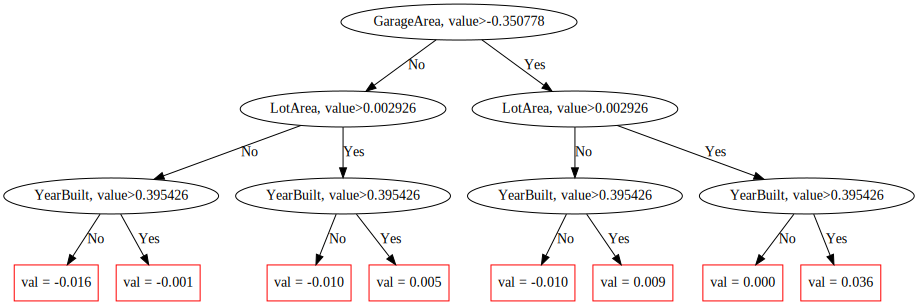

In [79]:
tree_idx=5

model_reg.plot_tree(tree_idx=tree_idx,
                pool = train_data_reg)

**История обучения**

In [80]:
results = model_reg.evals_result_

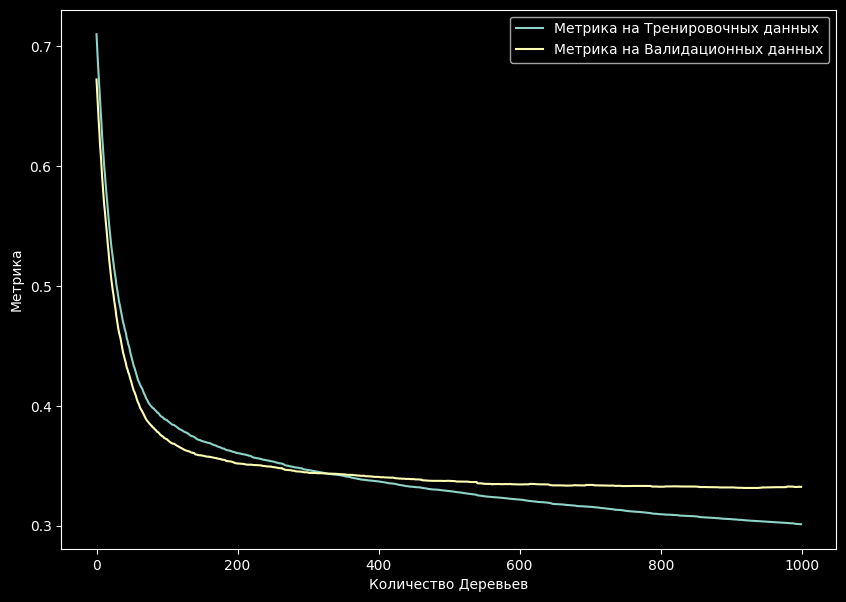

In [81]:
plt.figure(figsize=(10,7))
plt.plot(results["learn"]["MAE"], label="Метрика на Тренировочных данных")
plt.plot(results["validation"]["MAE"], label="Метрика на Валидационных данных")
plt.xlabel("Количество Деревьев")
plt.ylabel("Метрика")
plt.legend();

Средняя абсолютная ошибка почти одинакова на тренировочных и валидационных данных, однако на валидационных она начинает расти после 400 деревьев, что не есть хорошо.

# Визуализация значимости признаков

In [82]:
def feature_importance_plotter(model, features_names):
    feature_importance = model.feature_importances_

    sorted = np.argsort(feature_importance)

    ypos = np.arange(len(features_names))

    fig= plt.figure(figsize=(8,4))
    plt.barh(ypos, feature_importance[sorted])
    #plt.xlim([0,1])
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos,features_names[sorted] );

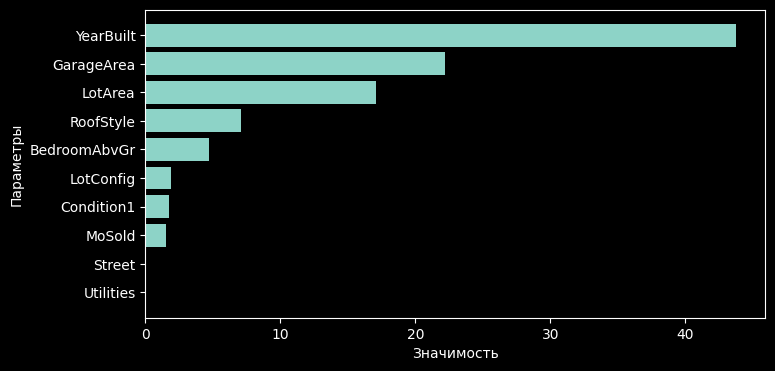

In [83]:
feature_importance_plotter(model_reg, np.array(features_names))

# Оценка метрик

In [84]:
def calculate_metric(model_pipe, X, y, metric = r2_score):
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [85]:
print(f"r2 на тренировочной выборке: {calculate_metric(model_reg, train_data_reg, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model_reg, eval_data_reg, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model_reg, train_data_reg, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model_reg, eval_data_reg, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.7536
r2 на валидационной выборке: 0.7047
mse на тренировочной выборке: 0.2581
mse на валидационной выборке: 0.2608


Метрика r2 на валидационной выборке у базовой модели CatBoost лучше, чем у HistGradientBoosting (0.6963 -> 0.7047). Метрика mse почти однакова что там, что тут

# Кросс-валидация

In [86]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [87]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [88]:
cross_validation (X_train, y_train,
                  model_reg,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

0:	learn: 0.7212956	total: 2.02ms	remaining: 2.01s
100:	learn: 0.3891126	total: 365ms	remaining: 3.25s
200:	learn: 0.3619248	total: 820ms	remaining: 3.26s
300:	learn: 0.3500520	total: 1.22s	remaining: 2.83s
400:	learn: 0.3404449	total: 1.79s	remaining: 2.68s
500:	learn: 0.3321540	total: 2.22s	remaining: 2.21s
600:	learn: 0.3253948	total: 2.33s	remaining: 1.55s
700:	learn: 0.3183747	total: 2.49s	remaining: 1.06s
800:	learn: 0.3121717	total: 2.82s	remaining: 702ms
900:	learn: 0.3073226	total: 3.1s	remaining: 341ms
999:	learn: 0.3027627	total: 3.32s	remaining: 0us
0:	learn: 0.7064998	total: 5.44ms	remaining: 5.43s
100:	learn: 0.3864418	total: 317ms	remaining: 2.82s
200:	learn: 0.3574093	total: 538ms	remaining: 2.14s
300:	learn: 0.3440964	total: 804ms	remaining: 1.87s
400:	learn: 0.3337649	total: 1.12s	remaining: 1.67s
500:	learn: 0.3259444	total: 1.46s	remaining: 1.46s
600:	learn: 0.3199068	total: 1.78s	remaining: 1.18s
700:	learn: 0.3141334	total: 2.15s	remaining: 917ms
800:	learn: 0.309

,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,3.569845,0.007697,0.673055,-0.193921,-0.324234,-1.498433
1,3.030581,0.015600,0.623201,-0.576995,-0.404377,-5.586612
2,2.652306,0.026559,0.705138,-0.376589,-0.375281,-3.824838
3,3.756045,0.037855,0.764886,-0.188914,-0.313835,-1.481412
4,4.852030,0.011997,0.685246,-0.239727,-0.366119,-1.579406




test_R2      0.690305
test_-MSE   -0.315229
test_-MAE   -0.356769
test_-Max   -2.794140
dtype: float64


На кросс-валидации метрики чуть хуже, но не намного

# Визуализация ошибок от scikit-learn

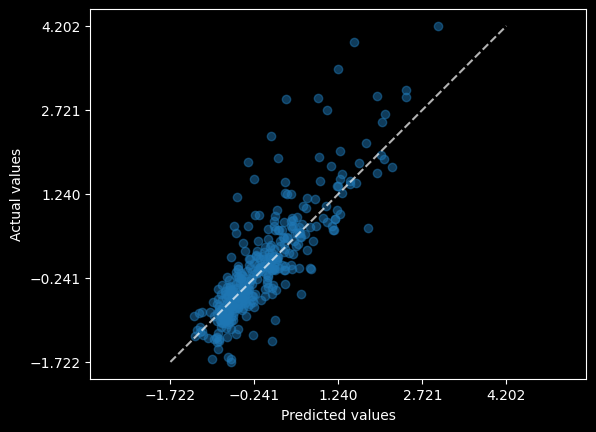

In [89]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model_reg.predict(eval_data_reg),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
        line_kwargs = {"color" : 'white'}

);

Тут в целом все хорошо, огромных отклонений нет

# Уберем проблемные объекты

In [90]:
# метод возвращает отсортированные списки индексов и скоров
idxs, scores = model_reg.get_object_importance(
    train_data_reg, eval_data_reg ,
    importance_values_sign="Positive"
)
len(idxs)


Iteration with suspicious time 0.00537 sec ignored in overall statistics.

Iteration with suspicious time 0.00507 sec ignored in overall statistics.

Iteration with suspicious time 0.0101 sec ignored in overall statistics.

Iteration with suspicious time 0.0101 sec ignored in overall statistics.


191

In [91]:
# Попробуем отбросить топ-100 найденных и посмотрим как изменится точность
train_pool = Pool(
    X_train.reset_index(drop=True).drop(idxs[:100]),
    y_train.reset_index(drop=True).drop(idxs[:100]),
    cat_features=cat_columns_new,
)

model_clean =  CatBoostRegressor(iterations = 1000,
                           early_stopping_rounds=100,
                           verbose = 100,
                           cat_features = cat_columns_new,
                           depth = 3,
                              objective  = 'MAE',
                           eval_metric= 'MAE',
                              random_state = 42
                           )

model_clean.fit(
    train_pool,
    eval_set=eval_data_reg,
    verbose=100,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=100,
)

0:	learn: 0.7154269	test: 0.6732534	best: 0.6732534 (0)	total: 3.75ms	remaining: 3.75s
100:	learn: 0.3917679	test: 0.3819117	best: 0.3819117 (100)	total: 361ms	remaining: 3.21s
200:	learn: 0.3611928	test: 0.3601461	best: 0.3601461 (200)	total: 728ms	remaining: 2.89s
300:	learn: 0.3461327	test: 0.3524176	best: 0.3524176 (300)	total: 883ms	remaining: 2.05s
400:	learn: 0.3343122	test: 0.3470910	best: 0.3470906 (399)	total: 1.13s	remaining: 1.69s
500:	learn: 0.3261057	test: 0.3438906	best: 0.3438906 (500)	total: 1.45s	remaining: 1.45s
600:	learn: 0.3185793	test: 0.3416331	best: 0.3416331 (600)	total: 1.6s	remaining: 1.06s
700:	learn: 0.3119510	test: 0.3401689	best: 0.3401405 (698)	total: 1.83s	remaining: 782ms
800:	learn: 0.3060023	test: 0.3386914	best: 0.3386710 (799)	total: 2.25s	remaining: 560ms
900:	learn: 0.3008272	test: 0.3372740	best: 0.3372267 (898)	total: 2.46s	remaining: 270ms
999:	learn: 0.2962733	test: 0.3349006	best: 0.3348805 (994)	total: 2.78s	remaining: 0us

bestTest = 0.33

In [92]:
print(f"r2 на тренировочной выборке: {calculate_metric(model_clean, train_data_reg, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model_clean, eval_data_reg, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model_clean, train_data_reg, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model_clean, eval_data_reg, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.7415
r2 на валидационной выборке: 0.7058
mse на тренировочной выборке: 0.2708
mse на валидационной выборке: 0.2599


Стало совсем чуть-чуть лучше

# Оптимизация гиперпараметров

In [93]:
from scipy import stats

model = CatBoostRegressor(
    random_seed=42,
    thread_count=-1,
    cat_features=cat_columns_new,
    eval_metric="RMSE",
    verbose=500,
)

param_distribution = {
    "one_hot_max_size": stats.bernoulli(p=0.2, loc=2),
    "learning_rate": [0.03, 0.1, 0.3],
    "l2_leaf_reg": [2, 5, 7],
    "depth": stats.binom(n=10, p=0.2),
}
randomized_search_result = model.randomized_search(param_distribution, X_train, y_train)
model.best_score_

0:	learn: 1.0274531	test: 0.9287055	best: 0.9287055 (0)	total: 1.64ms	remaining: 1.64s
500:	learn: 0.5140344	test: 0.5082916	best: 0.5075254 (274)	total: 660ms	remaining: 657ms
999:	learn: 0.4801522	test: 0.5002425	best: 0.5000400 (959)	total: 1.28s	remaining: 0us

bestTest = 0.5000400357
bestIteration = 959

0:	loss: 0.5000400	best: 0.5000400 (0)	total: 1.32s	remaining: 11.9s
0:	learn: 1.0430498	test: 0.9426248	best: 0.9426248 (0)	total: 255us	remaining: 255ms
500:	learn: 1.0418958	test: 0.9494030	best: 0.9426248 (0)	total: 88ms	remaining: 87.6ms
999:	learn: 1.0418958	test: 0.9494030	best: 0.9426248 (0)	total: 159ms	remaining: 0us

bestTest = 0.9426247979
bestIteration = 0

1:	loss: 0.9426248	best: 0.5000400 (0)	total: 1.49s	remaining: 5.96s
0:	learn: 1.0274531	test: 0.9287055	best: 0.9287055 (0)	total: 924us	remaining: 923ms
500:	learn: 0.5140344	test: 0.5082916	best: 0.5075254 (274)	total: 533ms	remaining: 531ms
999:	learn: 0.4801522	test: 0.5002425	best: 0.5000400 (959)	total: 1.15

{'learn': {'RMSE': 0.2605021628670218}}

In [94]:
# Лучшие параметры модели из перебора
randomized_search_result["params"]

{'depth': 4, 'one_hot_max_size': 2, 'learning_rate': 0.1, 'l2_leaf_reg': 5}

In [95]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, train_data_reg, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, eval_data_reg, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, train_data_reg, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, eval_data_reg, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.9189
r2 на валидационной выборке: 0.7359
mse на тренировочной выборке: 0.0849
mse на валидационной выборке: 0.2333


Судя по метрикам модель с оптимизацией стала работать явно лучше. Сохраним эту модель

In [96]:
# сохранение модели
model.save_model("catboost_model.cbm", format="cbm")

# Выводы

Модель CatBoost работает лучше гистограммного градиентного бустинга. Таким образом она работает лучше модели линейной регрессии с добавлением признаков и гиперпараметрами, а также лучше модели деревьев решений.

Сравним показатели CatBoost и HistGradientBoosting. На валидационной выборке увеличилась метрика r2 (0.7154 -> 0.7359), а также улучшились показатели метрики функции ошибок mse (0.2514 -> 0.2333). Можно сделать вывод, что между этих двух бустингов побеждает CatBoost 💪

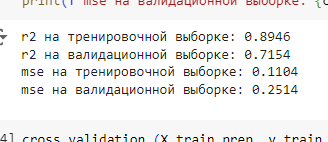